In [8]:
from ax import (
    Experiment,
    Metric,
    Objective,
    OptimizationConfig,
    RangeParameter,
    ParameterType,
    SearchSpace,
    Runner,
    Data,
)
from ax.modelbridge.registry import Models
import numpy as np
import pandas as pd
from ax.metrics.noisy_function import NoisyFunctionMetric
import numpy.typing as npt
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Define the Custom Gaussian Metric
class GaussianMetric(NoisyFunctionMetric):
    def f(self, x: npt.NDArray) -> float:
        # Gaussian response function
        return float(np.exp(-((x[0] - 0.2) ** 2 + (x[1] - 0.1) ** 2) / (2 * 0.1 ** 2)))


# Define the Search Space
search_space = SearchSpace(
    parameters=[
        RangeParameter(name="x0", parameter_type=ParameterType.FLOAT, lower=-1, upper=1.0),
        RangeParameter(name="x1", parameter_type=ParameterType.FLOAT, lower=-1, upper=1.0),
    ]
)

# Define the Optimization Config
optimization_config = OptimizationConfig(
    objective=Objective(
        metric=GaussianMetric(name="gaussian", param_names=["x0", "x1"]),
        minimize=False,
    )
)

# Define a Runner (Dummy for this example)
class MyRunner(Runner):
    def run(self, trial):
        trial_metadata = {"name": str(trial.index)}
        return trial_metadata


# Create the Experiment
exp = Experiment(
    name="gaussian_experiment",
    search_space=search_space,
    optimization_config=optimization_config,
    runner=MyRunner(),
)

# Perform Optimization
NUM_SOBOL_TRIALS = 20
NUM_BOTORCH_TRIALS = 30

# Sobol Initialization
sobol = Models.SOBOL(search_space=search_space)
for i in range(NUM_SOBOL_TRIALS):
    trial = exp.new_trial(generator_run=sobol.gen(n=1))
    trial.run()
    trial.mark_completed()
    print(f"SOBOL: {i}")

# Bayesian Optimization
for i in range(NUM_BOTORCH_TRIALS):
    gpei = Models.BOTORCH_MODULAR(experiment=exp, data=exp.fetch_data())
    trial = exp.new_trial(generator_run=gpei.gen(n=1))
    trial.run()
    trial.mark_completed()
    print(f"GPEI: {i}")



SOBOL: 0
SOBOL: 1
SOBOL: 2
SOBOL: 3
SOBOL: 4
SOBOL: 5
SOBOL: 6
SOBOL: 7
SOBOL: 8
SOBOL: 9
SOBOL: 10
SOBOL: 11
SOBOL: 12
SOBOL: 13
SOBOL: 14
SOBOL: 15
SOBOL: 16
SOBOL: 17
SOBOL: 18
SOBOL: 19


GPEI: 0
GPEI: 1
GPEI: 2
GPEI: 3
GPEI: 4
GPEI: 5
GPEI: 6
GPEI: 7
GPEI: 8
GPEI: 9
GPEI: 10


/Users/deniz/anaconda3/envs/ds310/lib/python3.10/site-packages/botorch/optim/initializers.py:403: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


GPEI: 11
GPEI: 12
GPEI: 13


/Users/deniz/anaconda3/envs/ds310/lib/python3.10/site-packages/botorch/optim/initializers.py:403: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


GPEI: 14


/Users/deniz/anaconda3/envs/ds310/lib/python3.10/site-packages/botorch/optim/initializers.py:403: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


GPEI: 15


/Users/deniz/anaconda3/envs/ds310/lib/python3.10/site-packages/botorch/optim/initializers.py:403: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


GPEI: 16


/Users/deniz/anaconda3/envs/ds310/lib/python3.10/site-packages/botorch/optim/initializers.py:403: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


GPEI: 17


/Users/deniz/anaconda3/envs/ds310/lib/python3.10/site-packages/botorch/optim/initializers.py:403: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


GPEI: 18


/Users/deniz/anaconda3/envs/ds310/lib/python3.10/site-packages/botorch/optim/initializers.py:403: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


GPEI: 19


/Users/deniz/anaconda3/envs/ds310/lib/python3.10/site-packages/botorch/optim/initializers.py:403: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


GPEI: 20


/Users/deniz/anaconda3/envs/ds310/lib/python3.10/site-packages/botorch/optim/initializers.py:403: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


GPEI: 21


/Users/deniz/anaconda3/envs/ds310/lib/python3.10/site-packages/botorch/optim/initializers.py:403: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


GPEI: 22


/Users/deniz/anaconda3/envs/ds310/lib/python3.10/site-packages/botorch/optim/initializers.py:403: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


GPEI: 23
GPEI: 24


/Users/deniz/anaconda3/envs/ds310/lib/python3.10/site-packages/botorch/optim/initializers.py:403: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


GPEI: 25
GPEI: 26


/Users/deniz/anaconda3/envs/ds310/lib/python3.10/site-packages/botorch/optim/initializers.py:403: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


GPEI: 27


/Users/deniz/anaconda3/envs/ds310/lib/python3.10/site-packages/botorch/optim/initializers.py:403: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


GPEI: 28
GPEI: 29


/Users/deniz/anaconda3/envs/ds310/lib/python3.10/site-packages/botorch/optim/initializers.py:403: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


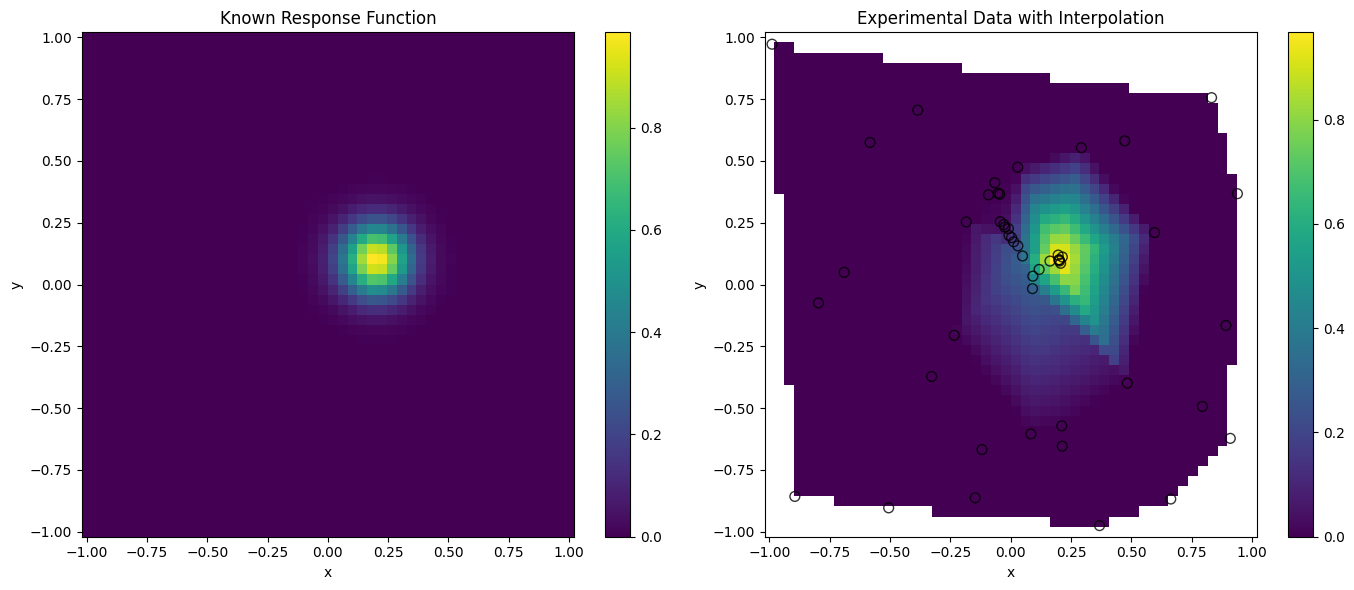

In [7]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np

# Define the grid for the known response function
x_grid = np.linspace(-1, 1, 50)
y_grid = np.linspace(-1, 1, 50)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)

# Compute the known response function over the grid
z_grid = np.exp(-((x_mesh - 0.2) ** 2 + (y_mesh - 0.1) ** 2) / (2 * 0.1 ** 2))

# Extract sample points and metric values from the experiment
x_samples = []
y_samples = []
z_samples = []

data = exp.fetch_data().df

for trial_index, trial in exp.trials.items():
    arm = trial.arm
    if arm is not None:
        x_samples.append(arm.parameters["x0"])
        y_samples.append(arm.parameters["x1"])
        # Fetch the mean metric value corresponding to this trial
        mean_values = data.loc[data["trial_index"] == trial_index, "mean"].values
        if len(mean_values) > 0:
            z_samples.append(mean_values[0])
        else:
            # Handle the case where the mean value is not found
            z_samples.append(0.0)

x_samples = np.array(x_samples)
y_samples = np.array(y_samples)
z_samples = np.array(z_samples)

# Grid for interpolation of the experimental data
x_interp, y_interp = np.linspace(-1, 1, 50), np.linspace(-1, 1, 50)
x_interp_grid, y_interp_grid = np.meshgrid(x_interp, y_interp)
z_interp = griddata(
    (x_samples, y_samples), z_samples, (x_interp_grid, y_interp_grid), method="linear"
)

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Left: Known response function over the grid
c1 = ax[0].pcolormesh(x_mesh, y_mesh, z_grid, shading="auto", cmap="viridis")
fig.colorbar(c1, ax=ax[0])
ax[0].set_title("Known Response Function")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

# Right: Sample points with interpolated experimental data
c2 = ax[1].pcolormesh(
    x_interp_grid, y_interp_grid, z_interp, shading="auto", cmap="viridis"
)
fig.colorbar(c2, ax=ax[1])
ax[1].scatter(
    x_samples, y_samples, edgecolor="black", facecolor="none", s=50, alpha=0.8
)
ax[1].set_title("Experimental Data with Interpolation")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")

plt.tight_layout()
plt.show()
